# Подготовительные работы

In [1]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl

In [2]:
log_space=np.logspace(-6,6,13,endpoint=True)

In [3]:
warnings.simplefilter('ignore') # отключим предупреждения Anaconda

# Непосредственно сам процесс построения модели

In [19]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/X_new.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/y.pkl.gz', 'rb'))
print(Xdata_numpy['excitation'].shape)

(52,)


In [20]:
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

In [21]:
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy['X'], Ydata, test_size=0.1428 
)
print(X_train.shape)
print(y_train.shape)


(30, 10712)
(30, 3)


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
import sklearn

In [23]:
%%time
pls1 = PLSRegression()
scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,21), 
    'scale': [False], 
    'tol': [1e-06]
}
gridCought=GridSearchCV(pls1, parametrsNames, cv=5,scoring=scoring,refit='r2',return_train_score=True)
gridCought.fit(X_train,y_train)
r2_p=gridCought.score(X_test, y_test)
mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
mse_c=gridCought.cv_results_[ "mean_train_mse" ]
r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
r2_c=gridCought.cv_results_[ "mean_train_r2" ]
predictors=gridCought.predict(X_test)

Wall time: 9.71 s


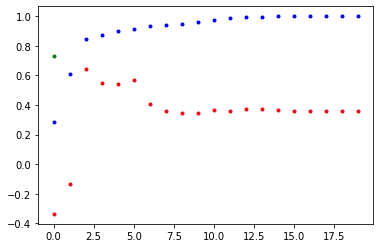

In [24]:
plt.plot(r2_p,".", color="green")
plt.plot(r2_c, ".", color="blue")
plt.plot(r2_cv,".", color="red")
plt.show()

In [25]:
max(r2_cv)

0.6399680173652001

In [26]:
min(mse_cv**0.5)

2.5134087299668058

In [9]:
gridCought.best_params_

{'copy': True,
 'max_iter': 10000,
 'n_components': 3,
 'scale': False,
 'tol': 1e-06}

In [65]:
gridCought.best_estimator_

PLSRegression(copy=True, max_iter=10000, n_components=3, scale=False, tol=1e-06)

In [66]:
max(r2_cv)

0.453279673660064

### Делаем красивый график R2 и сохраняем его

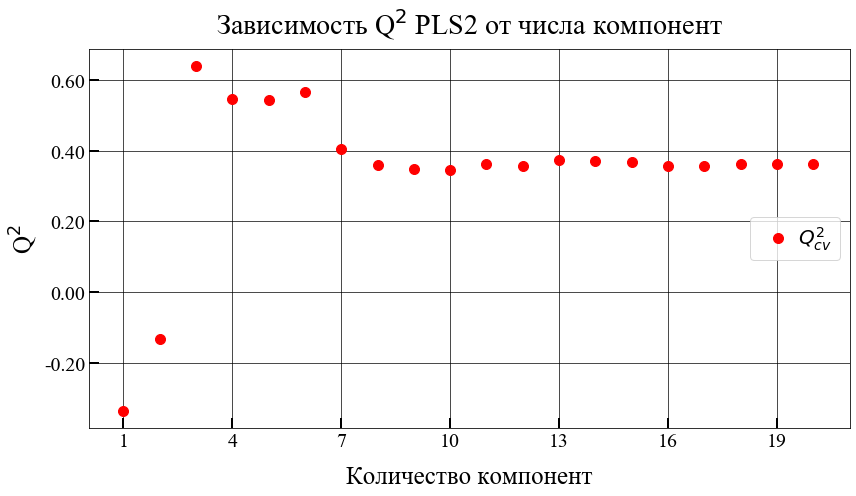

In [30]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(r2_cv,".",color="red",ms=20,label='$Q_{cv}^{2}$')
#axs.plot(r2_c,".",color="blue",ms=20,label='$R_c^{2}$')
#axs.plot(r2_p,".",color="green",ms=20,label='$R_p^{2}$')

axs.set_xticks(range(0,22,3)) # Задаём места, где будет сетка и метки по оси ох
#axs.set_yticks([0.7,0.75,0.8,0.85,0.9])

axs.set_ylabel('Q$^{2}$',  fontsize=25,labelpad=5)
axs.grid(color="black", drawstyle="default", linewidth=0.7)
axs.set_xlabel("Количество компонент",  fontsize=25,labelpad=15)
axs.set_title("Зависимость Q$^{2}$ PLS2 от числа компонент", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
#axs.ticklabel_format()

axs.set_xticklabels(range(1,23,3), fontsize=20)
axs.set_yticklabels(['0.70','-0.20','0.00','0.20','0.40','0.60','0.80','0.60','1.00'], fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
axs.legend(loc=7,fontsize=20, markerscale=1,handletextpad=0)

axs.set_xlim(xmax=20) # можно определить границы графика которые будут выводиться на экран
fig.tight_layout()
#fig.set_figwidth(12) можно задать размеры самого поля для рисования
#fig.set_figheight(6)

plt.savefig('PLS2_Q.png', format='png', dpi=300)
plt.savefig("PLS2_Q.svg", format="svg")


plt.show();

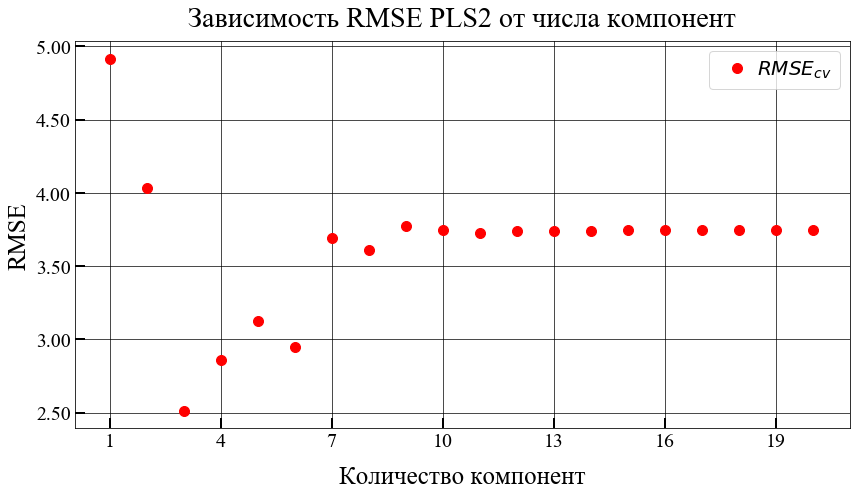

In [37]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(mse_cv**0.5,".",color="red",ms=20,label='$RMSE_{cv}$')
#axs.plot(r2_c,".",color="blue",ms=20,label='$R_c^{2}$')
#axs.plot(r2_p,".",color="green",ms=20,label='$R_p^{2}$')

axs.set_xticks(range(0,22,3)) # Задаём места, где будет сетка и метки по оси ох
#axs.set_yticks(np.linspace(0.26,0.46,num=6))

axs.set_ylabel('RMSE',  fontsize=25,labelpad=5)
axs.grid(color="black", drawstyle="default", linewidth=0.7)
axs.set_xlabel("Количество компонент",  fontsize=25,labelpad=15)
axs.set_title("Зависимость RMSE PLS2 от числа компонент", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
#axs.ticklabel_format()

axs.set_xticklabels(range(1,23,3), fontsize=20)
axs.set_yticklabels(['t','2.50','3.00','3.50','4.00','4.50','5.00','0.70','0.73'], fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
axs.legend(loc=1,fontsize=20, markerscale=1,handletextpad=0)

axs.set_xlim(xmax=20) # можно определить границы графика которые будут выводиться на экран
fig.tight_layout()
#fig.set_figwidth(12) можно задать размеры самого поля для рисования
#fig.set_figheight(6)

plt.savefig('PLS2_RMSE.png', format='png', dpi=300)
plt.savefig("PLS2_RMSE.svg", format="svg")


plt.show();

In [89]:
ii=2

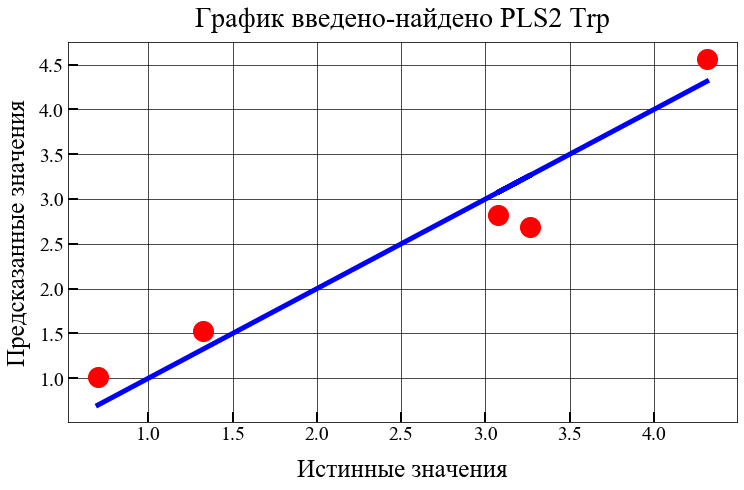

In [94]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(y_test.iloc[:,ii],predictors[:,ii],".",color="red",ms=40)
axs.plot(y_test.iloc[:,ii],y_test.iloc[:,ii],color="blue",lw=5)
#axs.set_xticks([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
axs.set_ylabel("Предсказанные значения" , fontsize=25,labelpad=8)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Истинные значения",  fontsize=25,labelpad=15)
axs.set_title("График введено-найдено PLS2 Trp", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'], fontsize=20)
axs.set_yticklabels(['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'], fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
plt.savefig('График введено-найдено PLS2 Trp.png', format='png', dpi=300)
plt.savefig("График введено-найдено PLS2 Trp.svg", format="svg")
plt.show();

In [77]:
pkl.dump(
	{'r2_cv': r2_cv, 'r2_c': r2_c, 'r2_p': r2_p, 'predict':predictors,'y_test':y_test,'parametrs':gridCought.best_params_},
	open('C:/Users/admin/Desktop/PLS2021/N-PLS/PLS2_final.pkl.gz', 'wb')
)

In [4]:
r2_cv=pkl.load(open('C:/Users/admin/Desktop/PLS2021/N-PLS/PLS2_final.pkl.gz', 'rb'))['r2_cv']

In [15]:
max(r2_cv)

0.49118166956607556

## Сохраним все результаты в пикль формате

In [80]:
pkl.dump(
	{'r2_cv': r2_cv, 'r2_c': r2_c, 'r2_p': r2_p},
	open('C:/Users/admin/Desktop/PLS2021/N-PLS/r2_PLS2.pkl.gz', 'wb')
)

### Здесь будут графики введено-найдено

In [94]:
pls2 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': [4], 
    'scale': [False], 
    'tol': [1e-06]
}

In [95]:
gridCought=GridSearchCV(pls2, parametrsNames, cv=5,return_train_score=True)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)

In [96]:
gridCought.score(X_test, y_test)

0.31990166147308063

In [97]:
gridCought.cv_results_[ "mean_test_score" ]

array([0.19611291])

In [98]:
gridCought.cv_results_[ "mean_train_score" ]

array([0.81439505])

In [116]:
ii=2

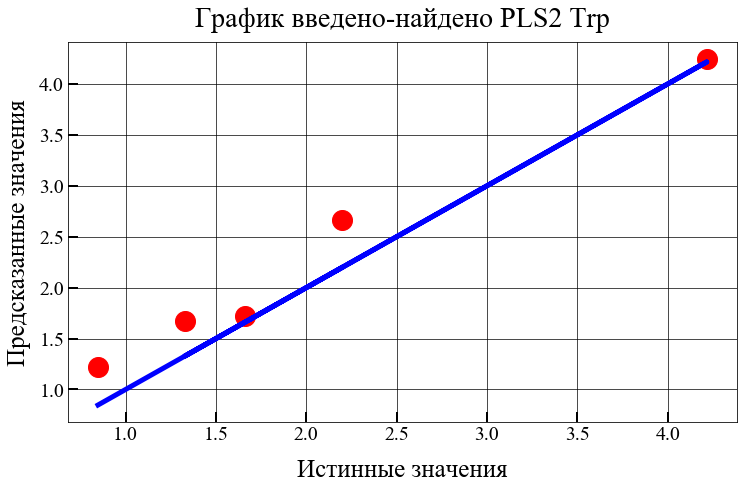

In [119]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(y_test.iloc[:,ii],predictors[:,ii],".",color="red",ms=40)
axs.plot(y_test.iloc[:,ii],y_test.iloc[:,ii],color="blue",lw=5)
axs.set_ylabel("Предсказанные значения" , fontsize=25,labelpad=8)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Истинные значения",  fontsize=25,labelpad=15)
axs.set_title("График введено-найдено PLS2 Trp", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'], fontsize=20)
axs.set_yticklabels(['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'], fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
plt.savefig('График введено-найдено PLS2 Trp.png', format='png', dpi=1024)
plt.show();

In [107]:
pkl.dump(
	{'True': y_test, 'Predict': predictors},
	open('C:/Users/admin/Desktop/PLS2021/N-PLS/PLS2_predict_reference.pkl.gz', 'wb')
)

# old

In [6]:
%%time
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy['X'], Ydata, test_size=0.1428 
)
print(X_train.shape)
print(y_train.shape)

#начинаем применять
pls2 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [1000000], 
    'n_components': [2], 
    'scale': [False], 
    'tol': [1]
}
gridCought=GridSearchCV(pls2, parametrsNames, cv=5,return_train_score=True)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)
s=np.mean((predictors-y_test)**2)

print(s)
print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



(25, 11330)
(25, 3)
Gominy    50.095908
Tyr        0.589188
Trp        0.122783
dtype: float64
{'copy': True, 'max_iter': 1000000, 'n_components': 2, 'scale': False, 'tol': 1}
Правильность на тестовом наборе: 0.51
Wall time: 320 ms


## вытаскиваем результаты не доступные решётчатому поиску

In [59]:
pls3 = PLSRegression(n_components=2,scale=False,max_iter=10000,tol=1.0)

In [60]:
pls3.fit(Xdata_numpy['X'],np.array(Ydata))

PLSRegression(copy=True, max_iter=10000, n_components=2, scale=False, tol=1.0)

In [86]:
weights=pls3.x_rotations_

In [87]:
weights.shape

(11330, 2)

In [88]:
weights.shape = (206, 55, weights.shape[1])

In [89]:
weights.shape

(206, 55, 2)

In [90]:
indexi=np.arange(1,35,5)

In [91]:
idi=np.arange(0,206,30)

In [92]:
indexx=np.arange(1,3,1)

In [93]:
ind=np.arange(0,55,7)

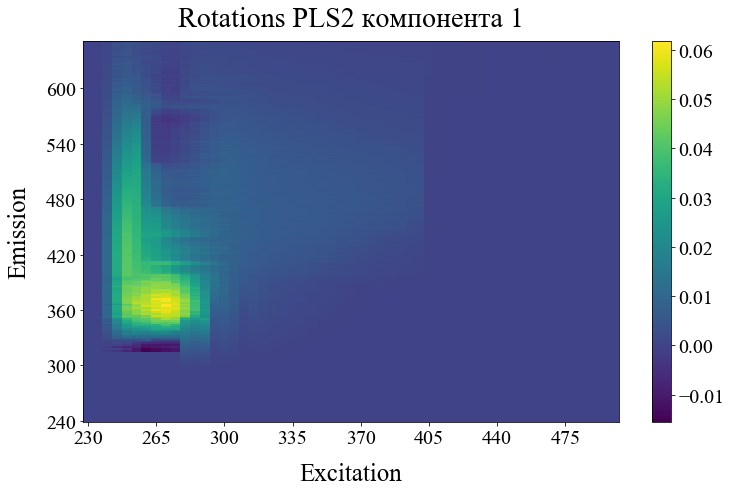

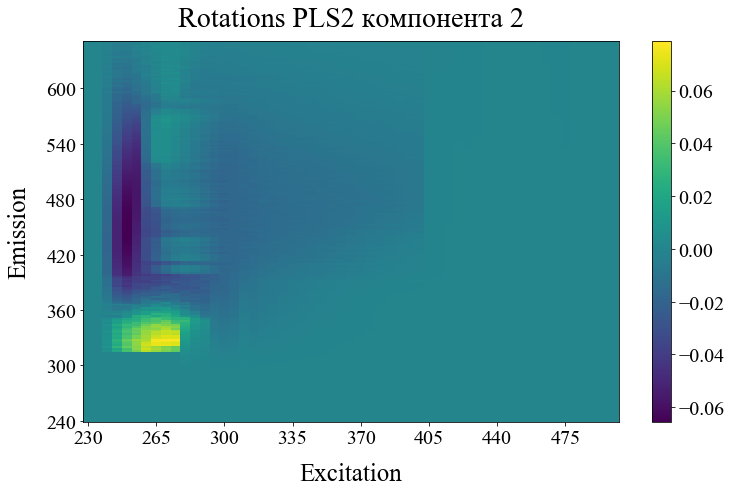

In [94]:
for i in range(0,2):
    mpl.rc('font',family='Times New Roman')
    plt.figure(figsize=(12,7))
    plt.imshow(weights[:,:,i],aspect="auto", origin='lower')

    plt.title("Rotations PLS2 компонента "+str(i+1),  {'fontname':'Times New Roman'}, fontsize=28,loc="center" ,pad=15)
    plt.ylabel("Emission" , fontsize=25,labelpad=15)
    plt.xlabel("Excitation",  fontsize=25,labelpad=15)
    plt.yticks(idi,Xdata_numpy['emission'][idi],fontsize=20)
    plt.xticks(ind,Xdata_numpy['excitation'][ind], fontsize=20)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=20)

    plt.savefig('Rotations PLS2 '+str(i)+'.png', format='png', dpi=1024)
plt.show();

In [39]:
pkl.dump(weights,open('C:/Users/admin/Desktop/88/PLS2_Score.pkl.gz', 'wb'))

In [19]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: 0.49


In [20]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.48


# Обрабатываем результаты

In [21]:
cvres  = gridCought.cv_results_

#### Попробуем сохранить в пикль результаты, что бы завтра не пересчитывать

In [22]:
pkl.dump(cvres,open('C:/Users/admin/Desktop/88/PLS2.pkl.gz', 'wb'))

In [23]:
pkl.dump(gridCought.best_params_,open('C:/Users/admin/Desktop/88/PLS2_bestparams.pkl.gz', 'wb'))

In [24]:
pkl.dump(gridCought.best_estimator_,open('C:/Users/admin/Desktop/88/PLS2_bestestimator.pkl.gz', 'wb'))

In [25]:
pkl.dump(gridCought.score,open('C:/Users/admin/Desktop/88/PLS2_bestscore.pkl.gz', 'wb'))

#### Перейти к следующему пункту при повторном использовании

In [26]:
ylow=gridCought.cv_results_[ "mean_test_score" ]

In [27]:
xlow=parametrsNames[ "n_components" ]

### Считаем данные, что бы заново не строить модель

In [4]:
cvr=pkl.load(open('C:/Users/admin/Desktop/88/PLS2.pkl.gz', 'rb'))

In [5]:
bestparameters=pkl.load(open('C:/Users/admin/Desktop/88/PLS2_bestparams.pkl.gz', 'rb'))

In [6]:
best_estimator=pkl.load(open('C:/Users/admin/Desktop/88/PLS2_bestestimator.pkl.gz', 'rb'))

In [7]:
best_score=pkl.load(open('C:/Users/admin/Desktop/88/PLS2_bestscore.pkl.gz', 'rb'))

### Формируем данные для графика

In [8]:
reg=[]
train=[]
test=[]

In [10]:
for mm,mean_score,  params  in zip(cvr [ "mean_train_score" ], cvr [ "mean_test_score" ], 
                                    cvr [ "params" ]
                                    ): 
    reg+=[params['n_components']]
    train+=[mm]
    test+=[mean_score]
    #print (mm,mean_score , params)

In [19]:
bestparameters

{'copy': True,
 'max_iter': 1000000,
 'n_components': 2,
 'scale': False,
 'tol': 1.0}

### Получаем ошибки

### Строим метки оси ох

In [11]:
xx=np.arange(-500,2500,500)

In [12]:
xlab=[]

In [13]:
for i in xx:
    xlab+=[cvr[ "params" ][i]['n_components']]

In [14]:
xlab6=np.linspace(-20,100,7)

In [15]:
xlab6

array([-20.,   0.,  20.,  40.,  60.,  80., 100.])

### Строим метки оси оу 

In [16]:
yy=np.linspace(-1,1.25,10)

In [17]:
yy=[-1.0  , -0.75, -0.5 , -0.25,  0.0  ,  0.25,  0.5 ,  0.75,  1.0  , 1.25]

In [32]:
xlab=[]
mmm=[]
ylow=[]
ylow2=[]
t=-1

In [33]:
for i in range(0,400):
    if (cvr[ "params" ][i]['scale']==False and t!=cvr[ "params" ][i]['n_components']):
        mmm+=[cvr[ "params" ][i]]
        xlab+=[cvr[ "params" ][i]['n_components']]
        t=cvr[ "params" ][i]['n_components']
        ylow+=[cvr[ "mean_test_score" ][i]]
        ylow2+=[cvr[ "mean_train_score" ][i]]

In [43]:
yy=[-1.0, -0.75, -0.5,-0.25,  -0.0,0.25,  0.50, 0.75,  1,  1.2 ]

In [35]:
len(xlab)

15

In [36]:
xlab3=[]
for i in np.arange(0,19,2):
    xlab3+=[i]

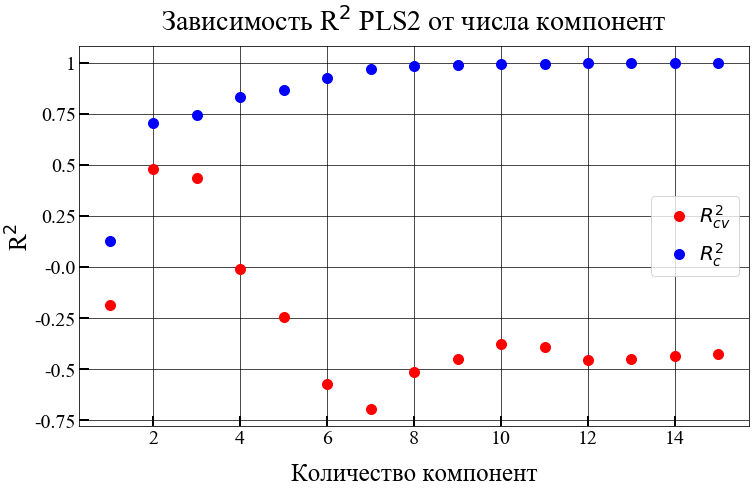

In [47]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(xlab,ylow,".",color="red",ms=20,label='$R_{cv}^{2}$')
axs.plot(xlab,ylow2,".",color="blue",ms=20,label='$R_c^{2}$')
axs.set_ylabel('R$^{2}$',  fontsize=25,labelpad=0)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Количество компонент",  fontsize=25,labelpad=15)
axs.set_title("Зависимость R$^{2}$ PLS2 от числа компонент", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(xlab3, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
axs.legend(loc=7,fontsize=20, markerscale=1,handletextpad=0)

plt.savefig('Зависимость score от параметров для PLS2.png', format='png', dpi=1024)
plt.show();

# График нового образца

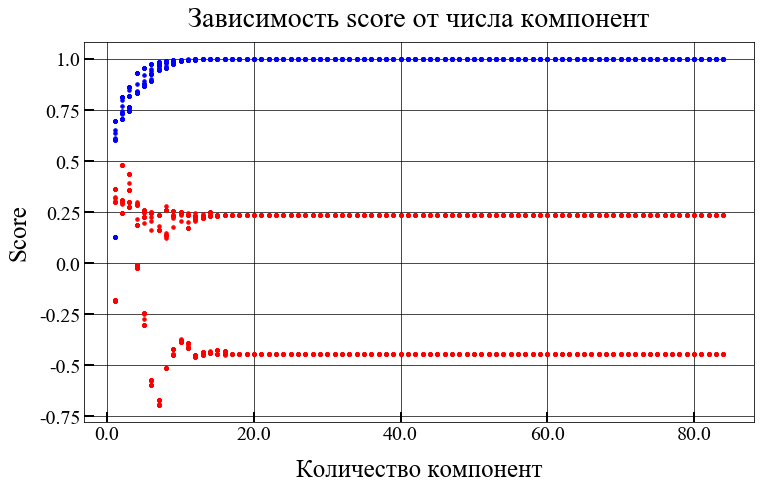

In [18]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(reg,test,".",color="red",ms=7,label="meam_test_score")
axs.plot(reg,train,".",color="blue",ms=7,label="meam_train_score")
axs.set_ylabel("Score" , fontsize=25,labelpad=8)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Количество компонент",  fontsize=25,labelpad=15)
axs.set_title("Зависимость score от числа компонент", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(xlab6, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
plt.savefig('Зависимость ошибки от параметров для PLS2.png', format='png', dpi=1024)
plt.show();

In [ ]:
axs.set_xticklabels(xlab, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)

### Новые графики предикт референс

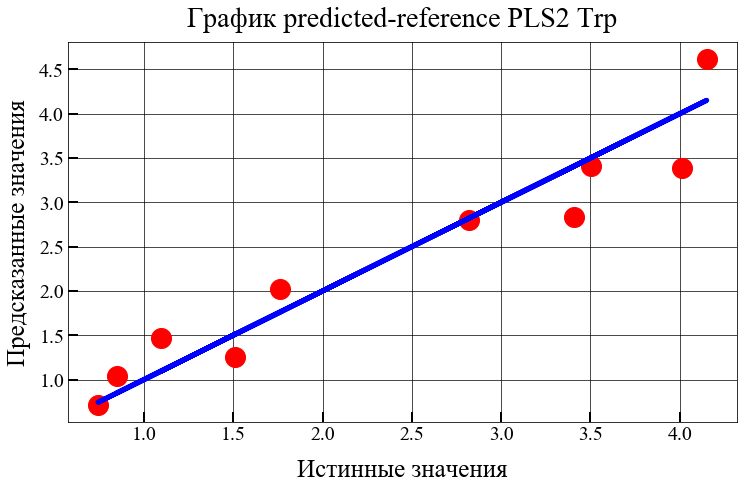

In [50]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(y_test.iloc[:,2],predictors[:,2],".",color="red",ms=40)
axs.plot(y_test.iloc[:,2],y_test.iloc[:,2],color="blue",lw=5)
axs.set_ylabel("Предсказанные значения" , fontsize=25,labelpad=8)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Истинные значения",  fontsize=25,labelpad=15)
axs.set_title("График predicted-reference PLS2 Trp", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(xlab6, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
plt.savefig('График predicted-reference PLS2 Trp.png', format='png', dpi=1024)
plt.show();

In [ ]:
axs.set_xticklabels(xlab6, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)

In [43]:
xlab6=np.arange(0.5,4.5,0.5)

In [48]:
yy=np.arange(0.5,5,0.5)

# Графики старым методом построенные

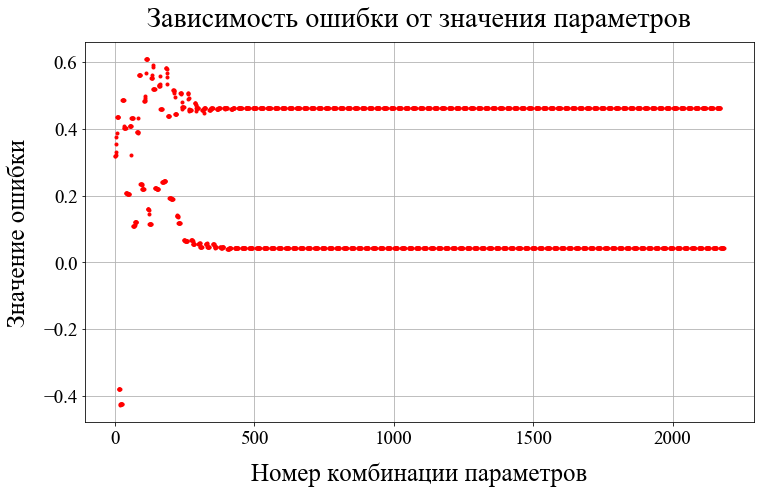

In [15]:
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(12,7))
plt.plot(ylow,".",color="red")
plt.ylabel("Значение ошибки" , fontsize=25,labelpad=12)
plt.grid()
plt.xlabel("Номер комбинации параметров",  fontsize=25,labelpad=15)
plt.title("Зависимость ошибки от значения параметров", fontsize=28,loc="center" ,pad=15)


plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.savefig('Зависимость ошибки от параметров для PLS2.jpeg', format='png', dpi=100)
plt.show();

# Графики predicted-reference

In [16]:
import matplotlib.pyplot as plt

In [17]:
import matplotlib as mpl

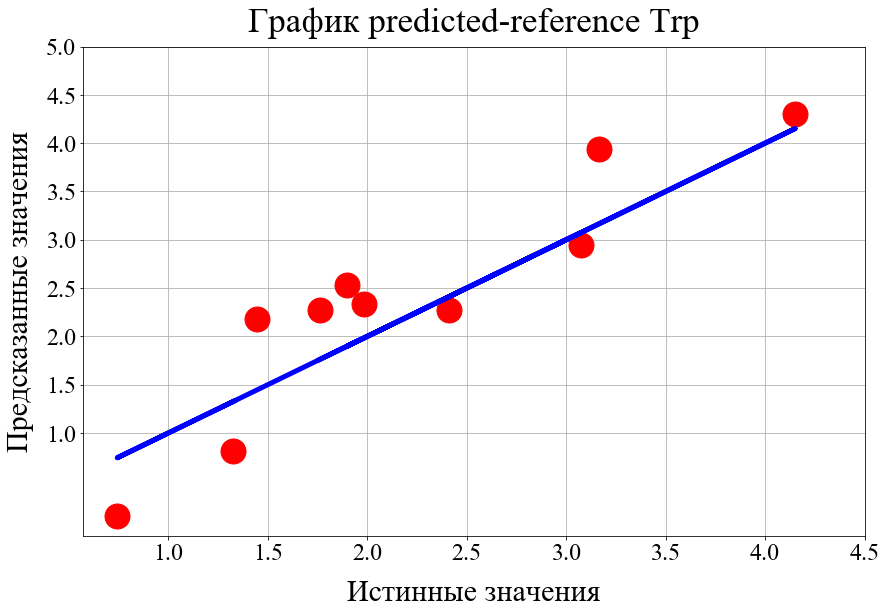

In [21]:
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(14,9))
plt.plot(y_test.iloc[:,2],predictors[:,2], ".",color="red",ms=50)
plt.plot(y_test.iloc[:,2],y_test.iloc[:,2],color="blue",lw=5)

plt.ylabel("Предсказанные значения" , fontsize=30,labelpad=12)
plt.grid()
plt.xlabel("Истинные значения",  fontsize=30,labelpad=15)
plt.title("График predicted-reference Trp", fontsize=35,loc="center" ,pad=15)


plt.yticks(area3y,fontsize=24)
plt.xticks(area3x,fontsize=24)
plt.savefig('График predicted-reference Trp_PLS2.jpeg', format='png', dpi=100)
plt.show();

In [19]:
area3x=np.arange(1,5,0.5)

In [20]:
area3y=np.arange(1,5.5,0.5)

In [126]:
results = pd.DataFrame(gridCought.cv_results_) 
# показываем первые 5 строк 
display(results.head()) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy,param_max_iter,param_n_components,param_scale,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026373,0.004175,0.005013,0.000635,True,10000,1,True,0.0001,"{'copy': True, 'max_iter': 10000, 'n_component...",0.570990,0.746224,0.412662,0.401942,0.470672,0.520498,0.127803,37
1,0.028881,0.006150,0.005315,0.001404,True,10000,1,True,1e-05,"{'copy': True, 'max_iter': 10000, 'n_component...",0.569772,0.736031,0.407306,0.357752,0.479381,0.510048,0.133660,38
2,0.027159,0.005388,0.005065,0.000642,True,10000,1,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.568953,0.733435,0.405650,0.344673,0.481953,0.506933,0.135912,39
3,0.029384,0.006985,0.005115,0.000665,True,10000,1,True,1e-07,"{'copy': True, 'max_iter': 10000, 'n_component...",0.568835,0.732233,0.405138,0.340428,0.482728,0.505872,0.136571,40
4,0.041224,0.006158,0.006519,0.001002,True,10000,2,True,0.0001,"{'copy': True, 'max_iter': 10000, 'n_component...",0.402958,0.832417,0.832148,0.654697,0.560354,0.656515,0.164518,13


In [127]:
scores = np.array(results.mean_test_score).reshape(100, 1) 
import mglearn 
# строим теплокарту средних значений правильности перекрестной проверки 
mglearn.tools.heatmap(scores, xlabel='n_components', xticklabels=parametrsNames['n_components'], 
                      ylabel='max_iter', yticklabels=parametrsNames['max_iter'], cmap="viridis")

ValueError: cannot reshape array of size 56 into shape (100,1)

In [128]:
from  sklearn.metrics import  mean_squared_error #среднеквадратичная ошибка
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

2.201381052561823


In [129]:
type(y_test)

pandas.core.frame.DataFrame

In [130]:
print(predictors[:,0])
print(y_test.iloc[:,0])


[48.20753427 34.0298281  53.50931346 42.80107016 38.51297221]
0     45.446791
33    35.398815
29    46.322119
12    44.546831
17    36.226228
Name: Gominy, dtype: float64


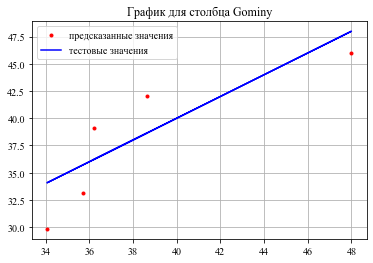

In [20]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(y_test.iloc[:,0],predictors[:,0],".",color="red",label="предсказанные значения")
plt.plot(y_test.iloc[:,0],y_test.iloc[:,0],color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();


In [132]:
cvres  =  gridCought.cv_results_ 
for mean_score,  params  in zip (cvres [ "mean_test_score" ], cvres [ "params" ] ): 
    print (np.sqrt(-mean_score),  params)


nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-07}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-07}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 0.0001}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-05}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components